In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split,KFold, GridSearchCV
from sklearn.metrics import r2_score
import os
os.chdir(r"C:\Training\Academy\Statistics (Python)\Cases\Concrete Strength")

In [2]:
concrete = pd.read_csv("Concrete_Data.csv")
X = concrete.drop('Strength', axis=1)
y = concrete['Strength']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=24)
dtr = DecisionTreeRegressor(random_state=24)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
print(r2_score(y_test, y_pred))

0.83089474226832


### Grid Search

In [5]:
dtr = DecisionTreeRegressor(random_state=24)
params = {'min_samples_split':[2, 10, 25, 50],
          'min_samples_leaf':[1,2, 5, 7, 10, 25, 50],
          'max_depth':[None, 4, 6]}
kfold = KFold(n_splits=5, shuffle=True, random_state=24)
gcv = GridSearchCV(dtr, param_grid=params, cv=kfold, scoring='r2', verbose=3)
gcv.fit(X, y)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.798 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.792 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.876 total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=10;, score=0.872 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=10;, score=0.786 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=10;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=10;, score=0.811 total time=   0.0s
[CV 5/5] END max

GridSearchCV(cv=KFold(n_splits=5, random_state=24, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=24),
             param_grid={'max_depth': [None, 4, 6],
                         'min_samples_leaf': [1, 2, 5, 7, 10, 25, 50],
                         'min_samples_split': [2, 10, 25, 50]},
             scoring='r2', verbose=3)

In [6]:
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.8580807204193125


In [7]:
best_tree = gcv.best_estimator_

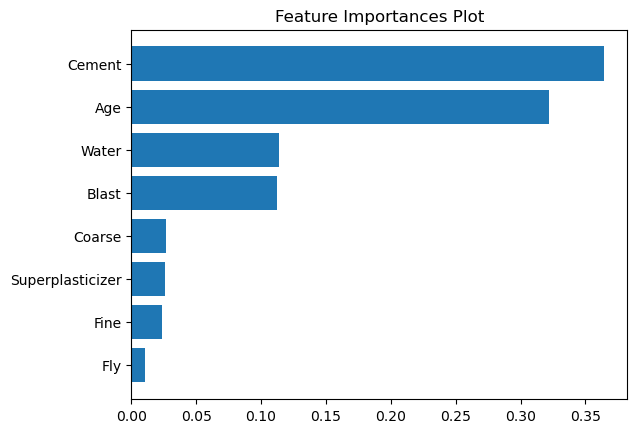

In [8]:
df_imp = pd.DataFrame({'feature':list(X.columns),
              'importance':best_tree.feature_importances_ })
df_imp.sort_values('importance', inplace=True)
plt.barh(df_imp['feature'], df_imp['importance'])
plt.title("Feature Importances Plot")
plt.show()

### Medical Cost Expenses

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer 
from sklearn.compose import make_column_selector

In [11]:
os.chdir(r"C:\Training\Academy\Statistics (Python)\Cases\Medical Cost Personal")
med = pd.read_csv("insurance.csv")
X = med.drop('charges', axis=1)
y = med['charges']

In [12]:
ohe = OneHotEncoder(handle_unknown='ignore')
ct = make_column_transformer(('passthrough', make_column_selector(dtype_exclude=object)  ),
                             (ohe, make_column_selector(dtype_include=object) ),
                            verbose_feature_names_out=False)
dtr = DecisionTreeRegressor(random_state=24)
pipe = Pipeline([('CT',ct),('DT',dtr)])

In [13]:
params = {'DT__min_samples_split':[2, 10, 25, 50],
          'DT__min_samples_leaf':[1, 5, 10, 25, 50],
          'DT__max_depth':[None, 4, 6]}
kfold = KFold(n_splits=5, shuffle=True, random_state=24)
gcv = GridSearchCV(pipe, param_grid=params, cv=kfold, scoring='r2', verbose=3)
gcv.fit(X, y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=2;, score=0.782 total time=   0.0s
[CV 2/5] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=2;, score=0.698 total time=   0.0s
[CV 3/5] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=2;, score=0.750 total time=   0.0s
[CV 4/5] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=2;, score=0.725 total time=   0.0s
[CV 5/5] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=2;, score=0.707 total time=   0.0s
[CV 1/5] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=10;, score=0.836 total time=   0.0s
[CV 2/5] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=10;, score=0.761 total time=   0.0s
[CV 3/5] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=10;, score=0.783 total time=   0.0s
[CV 4/5] END DT__max_de

GridSearchCV(cv=KFold(n_splits=5, random_state=24, shuffle=True),
             estimator=Pipeline(steps=[('CT',
                                        ColumnTransformer(transformers=[('passthrough',
                                                                         'passthrough',
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001BF22287A40>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001BF22285520>)],
                                                          verbose_feature_names_out=False)),
                                       ('DT',
                                        DecisionTreeRegressor(random_state=24))]),
             param_grid={'DT__max_depth': [None, 4, 6],
                         'DT__min_samples_leaf': [1, 5, 10, 25, 50],
                         'DT__min_samples_split': [2, 10, 25, 50]},
             scoring='r2', verbose=3)

In [14]:
print(gcv.best_params_)
print(gcv.best_score_)

{'DT__max_depth': 6, 'DT__min_samples_leaf': 50, 'DT__min_samples_split': 2}
0.8519043198478518


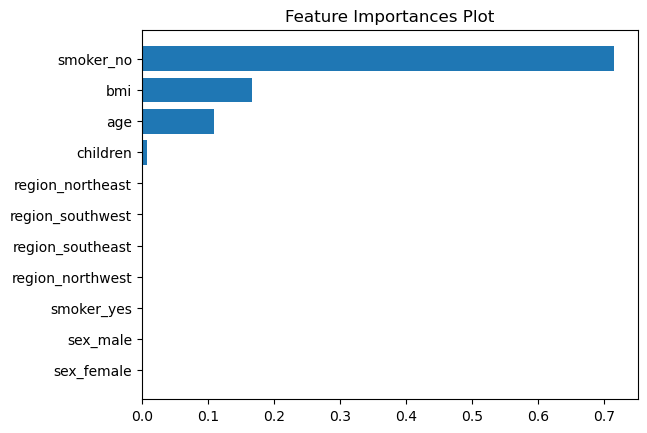

In [15]:
best_tree = gcv.best_estimator_.named_steps['DT'] 
df_imp = pd.DataFrame({'feature':list(gcv.best_estimator_.named_steps['CT'].get_feature_names_out()),
              'importance':best_tree.feature_importances_ })
df_imp.sort_values('importance', inplace=True)
plt.barh(df_imp['feature'], df_imp['importance'])
plt.title("Feature Importances Plot")
plt.show()